In [20]:
import pandas as pd
from matplotlib import pyplot as plt
from feat_to_model_eval import feat_to_model_kfold_eval

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv('df_train.csv')

In [4]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,...,zip_98136,zip_98144,zip_98146,zip_98148,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,17231,1450000.0,5,4.00,4070,2.0,0.0,0.0,3,10,...,0,0,0,0,0,0,0,0,0,0
1,11443,496700.0,3,2.50,1740,2.0,0.0,0.0,4,8,...,0,0,0,0,0,0,0,0,0,0
2,1774,327500.0,3,2.25,1770,1.0,0.0,0.0,3,8,...,0,0,0,0,0,0,0,0,0,0
3,6021,263500.0,2,1.00,750,1.0,0.0,0.0,3,6,...,0,0,0,0,0,0,0,0,0,0
4,12892,967000.0,4,2.50,3100,2.0,0.0,0.0,3,9,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['Unnamed: 0', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'sqft_living15', 'log_price', 'log_sqft_living',
       'log_sqft_living15', 'log_grade', 'zip_98001', 'zip_98002', 'zip_98003',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98011', 'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027',
       'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032',
       'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040',
       'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053', 'zip_98055',
       'zip_98058', 'zip_98059', 'zip_98065', 'zip_98070', 'zip_98072',
       'zip_98074', 'zip_98075', 'zip_98077', 'zip_98092', 'zip_98102',
       'zip_98103', 'zip_98105', 'zip_98106', 'zip_98107', 'zip_98108',
       'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117',
       'zip_98118', 'zip_98119', 'zip_98122', 

In [6]:
line, resids, rmse, mae, pvals = feat_to_model_kfold_eval(
                        'price', predictors=['sqft_living', 'sqft_living15'], df=df, 
                         kvals=[5,10,20], show_summary=True, MAE=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     9165.
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:20:20   Log-Likelihood:            -2.5511e+05
No. Observations:               18357   AIC:                         5.102e+05
Df Residuals:                   18354   BIC:                         5.103e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -9.987e+04   5939.094    -16.816      0.000   -1.12e+05   -8.82e+04
sqft_living     247.2063      3.208     77.056      0.000     240.918     253.495
sqft_living15    63.4142      4.306     14.726      0.000      54.973      71.855
==============================================================================
Omnibus:                    13598.076   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           644794.721
Skew:                           3.083   Prob(JB):                         0.00
Kurtosis:                      31.372   Cond. No.                     9.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

RMSE: 262735.52042352356
MAE: 173654.57345843816



Text(0, 0.5, 'how far off the model estimated')

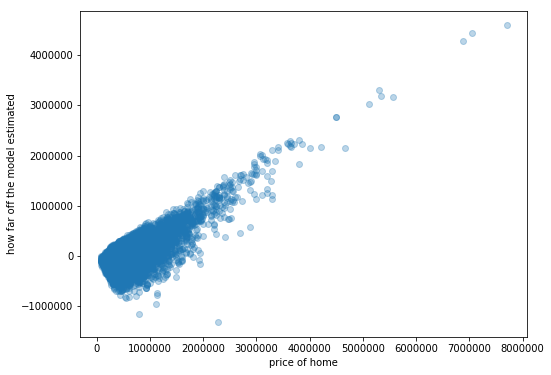

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(df.price, resids[:len(df)], alpha=0.3)
plt.xlabel('price of home')
plt.ylabel('how far off the model estimated')

Text(0, 0.5, 'how far off the model estimated')

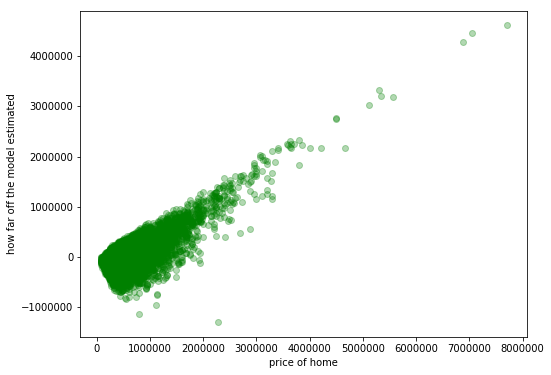

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df.price, resids[len(df):2*len(df)], c='green', alpha=0.3)
plt.xlabel('price of home')
plt.ylabel('how far off the model estimated')

In [9]:
zip_cols = df.loc[:,'zip_98001':].columns
zip_predictors = list(zip_cols)

feat_to_model_kfold_eval('price', predictors= zip_predictors, df=df, 
                         kvals=[5,10,20], MAE=True, return_items=False)

RMSE: 288085.1848376155
MAE: 163119.33244900432



In [10]:
predictors = ['log_sqft_living', 'log_sqft_living', 'log_grade'] + zip_predictors
feat_to_model_kfold_eval('log_price', predictors, df, 
                        kvals=[5, 10, 20], price_logged=True, MAE=True, return_items=False)

RMSE: 176105.8321775926
MAE: 87321.8067428987



In [11]:
predictors = ['log_sqft_living', 'log_sqft_living', 'log_grade', 'bathrooms'] + zip_predictors
feat_to_model_kfold_eval('log_price', predictors, df, 
                        kvals=[5, 10, 20], show_summary=True, price_logged=True, MAE=True, return_items=False)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1456.
Date:                Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:20:23   Log-Likelihood:                 2398.0
No. Observations:               18357   AIC:                            -4664.
Df Residuals:                   18291   BIC:                            -4148.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              7.2919      0.042    175.486      0.000       7.210       7.373
log_sqft_living[0]     0.2617      0.003     77.727      0.000       0.255       0.268
log_sqft_living[1]     0.2617      0.003     77.727      0.000       0.255       0.268
log_grade              0.8552      0.017     49.683      0.000       0.821       0.889
bathrooms              0.0036      0.003      1.083      0.279      -0.003       0.010
zip_98001             -0.4195      0.013    -31.563      0.000      -0.446      -0.393
zip_98002             -0.4257      0.017    -24.376      0.000      -0.460      -0.391
zip_98003             -0.4098      0.015    -28.068      0.000      -0.438      -0.381
zip_98004              0.7518      0.014     53.694      0.000       0.724       0.779
zip_98005              0.3481      0.019     18.607      0.000       0.311       0.385
zip_98006              0.2842      0.012     24.650      0.000       0.262       0.307
zip_98007              0.2245      0.020     11.381      0.000       0.186       0.263
zip_98008              0.2678      0.015     18.261      0.000       0.239       0.297
zip_98011              0.0095      0.017      0.561      0.575      -0.024       0.043
zip_98022             -0.2662      0.016    -16.441      0.000      -0.298      -0.234
zip_98023             -0.4525      0.011    -40.349      0.000      -0.475      -0.431
zip_98024              0.1072      0.027      4.027      0.000       0.055       0.159
zip_98027              0.1060      0.012      8.525      0.000       0.082       0.130
zip_98028             -0.0121      0.015     -0.820      0.412      -0.041       0.017
zip_98029              0.1453      0.014     10.407      0.000       0.118       0.173
zip_98030             -0.3888      0.015    -25.971      0.000      -0.418      -0.359
zip_98031             -0.3559      0.015    -23.729      0.000      -0.385      -0.327
zip_98032             -0.4497      0.021    -21.298      0.000      -0.491      -0.408
zip_98033              0.3871      0.012     32.049      0.000       0.363       0.411
zip_98034              0.1170      0.011     10.770      0.000       0.096       0.138
zip_98038             -0.2576      0.011    -23.850      0.000      -0.279      -0.236
zip_98039              0.9905      0.033     30.058      0.000       0.926       1.055
zip_98040              0.5631      0.015     38.349      0.000       0.534       0.592
zip_98042             -0.3509      0.011    -32.329      0.000      -0.372      -0.330
zip_98045             -0.0582      0.016     -3.600      0.000      -0.090      -0.027
zip_98052              0.2029      0.011     18.777      0.000       0.182       0.224
zip_98053              0.1832      0.012     14.671      0.000       0.159       0.208
zip_98055             -0.2811      0.0

RMSE: 175879.01640231517
MAE: 87324.52829718166



Text(0, 0.5, 'how far off the model estimated')

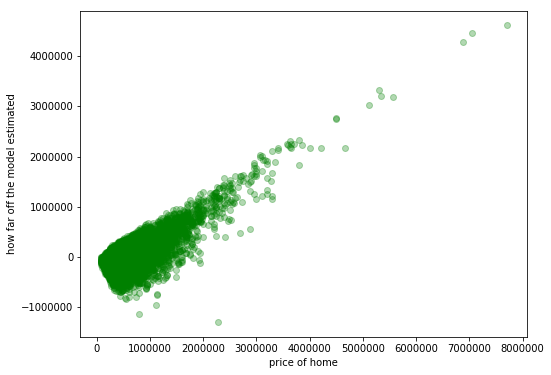

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df.price, resids[len(df):2*len(df)], c='green', alpha=0.3)
plt.xlabel('price of home')
plt.ylabel('how far off the model estimated')

In [13]:
#Slightly better without bathrooms

In [14]:
predictors = ['log_sqft_living', 'log_sqft_living', 'log_grade', 'bathrooms'] + zip_predictors
linear_coefs, resids, rmse, mae, pvals = feat_to_model_kfold_eval(
                                    'log_price', predictors, df, kvals=[5, 10, 20], 
                                    price_logged=True, MAE=True)

RMSE: 175879.01640231517
MAE: 87324.52829718166



In [15]:
for key, value in pvals.items():
    if value > 0.05:
        print(key)

bathrooms
zip_98011
zip_98028
zip_98065


In [21]:
from prediction import predict_home_price

In [23]:
pre41dict_home_price(linear_coefs=linear_coefs, price_logged=True, sqft_living=1800, sqft_living15= 4500, bathrooms=2, grade=12, zip_98027=1)

,sqft_living,log_sqft_living,sqft_living15,log_sqft_living15,bathrooms,grade,log_grade,zip_98027
test_home,1800.0,7.495542,4500.0,8.411833,2.0,12.0,2.484907,1.0


97889.11149833511